# NE 205: Semiconductor Devices and IC Technology

## Mid-Term Problem (Extra)

In [15]:
import scipy as sp
from scipy import constants
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms
import math
from obpds import *

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
MU='\u03BC'    
approx= '\u2248'
exponent_2= '\u00b2'
epsilon_0 = 0.01*constants.epsilon_0 # multiply by 0.01 to covert to F/cm 
q=constants.e
k=constants.k

T=300

Vth=k*T/q
epsilon_r=13
a0=epsilon_0*epsilon_r/q
a1=(2**(-1.5))
plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (20,20)

chi=GaAs.electron_affinity()

## Solution using OBPDS for no acceptor sheet

### $t_{i-GaAs}$ = 80 nm

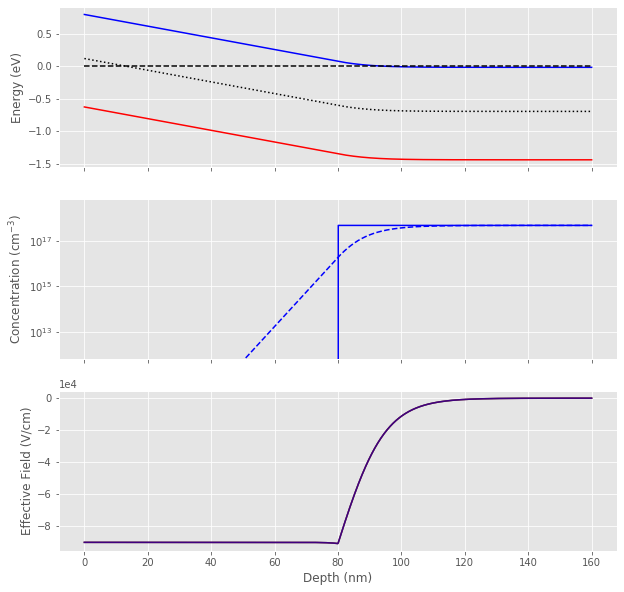

In [16]:
t=80
phi_b=0.8
phi_m=chi+phi_b

# Layers
i = Layer(t*nm, GaAs)
n = Layer(t*nm, GaAs, -4.7e17/cm3)

# Device
d = TwoTerminalDevice(layers=[i, n],
                      contacts=[SchottkyContact(phi_m), OhmicContact()],
                      Fn=['right','right'])

# Simulate and show the equilibrium band profile using the default method.
d.show_equilibrium()

### Solution

\begin{equation}
\begin{aligned}
        \boxed {
            N_D = 4.7 \times 10^{17} cm^{-3} \\[10pt]
            N_C = 4.7 \times 10^{17} cm^{-3} \\[10pt]
            \sigma =  10^{11}cm^{-2} \\[10pt]
            W_{i-GaAs} = 80\ nm \\[10pt]
            L = 10\ nm \\[10pt]
            E_G = 1.42\ eV \\[10pt]
            \phi_B = 0.8\ V \\[10pt]
            T = 300\ K \\[10pt]
         }  
        \end{aligned}
        \label{pr1}
    \tag{1}
\end{equation}

\begin{equation}  
  \boxed {
      V_{bi} = \phi_B+ \frac {k_B T}{q}(\ ln\frac{N_D}{N_C}+\frac{1}{\sqrt{8}}\frac{N_D}{N_C})
      }
\label{eq1.1}
\tag{1.1}
\end{equation}

In [17]:
Eg=1.42
Nc=Nd=4.7e17
r=Nd/Nc
sigma=1e11
W=8e-6
L=1e-6
phi=0.8
Vbi=phi+Vth*(math.log(r)+a1*r)
Vb=round(Vbi,2)

$\implies V_{bi} =$ {{Vb}} V

\begin{equation}  
  \boxed {
      V_{bi} = \frac{q}{\epsilon_0 \epsilon_r}(W N_D x_d - L \sigma + \frac{N_D x_d^2}{2}) 
      }
\label{eq1.2}
\tag{1.2}
\end{equation}

\begin{equation}  
  \boxed {
      V_{bi} = \frac{q}{\epsilon_0 \epsilon_r}(W N_D x_{d0} + \frac{N_D x_{d0}^2}{2}) 
      }
\label{eq1.3}
\tag{1.3}
\end{equation}

In [18]:
b=W*Nd
c0=-Vbi*a0
c_vbi=-L*sigma
c=c0+c_vbi
D=b*b-2*Nd*c
D0=b*b-2*Nd*c0
D_vbi=b*b-2*Nd*c_vbi
xd=(D**0.5-b)/Nd
xd0=(D0**0.5-b)/Nd
xd_vbi=(D_vbi**0.5-b)/Nd
x_d=round(1e7*xd,1)
x_d0=round(1e7*xd0,1)
sigma_m=sigma-Nd*xd
sigma_m_vbi=sigma-Nd*xd_vbi
charge_m=round(sigma_m*1e-11,1)

Metal charge density at no applied bias = {{charge_m}} $ \times 10^{11} cm^{-2}$

$x_d = $ {{x_d}} $nm$

$x_{d0} = $ {{x_d0}} $nm$

In [19]:
F0=sigma_m/a0
F0_vbi=sigma_m_vbi/a0
F1=F0-sigma/a0

def Ec(x):
    if(x<=L):
        return phi+F0*x
    if(x<=W):
        return F1*(x-L)+Ec(L)
    if(x<=W+xd):
        return Ec(W)+(F1+0.5*Nd*(x-W)/a0)*(x-W)
    return phi-Vbi

x=sp.linspace(0.1,2*W*1e7,1000) # x in nm
Ecb = lambda x : Ec(x*1e-7) # multiply by 1e-7 to convert x in nm to cm
E_cb = sp.vectorize(Ecb)(x)
E_vb = E_cb-Eg

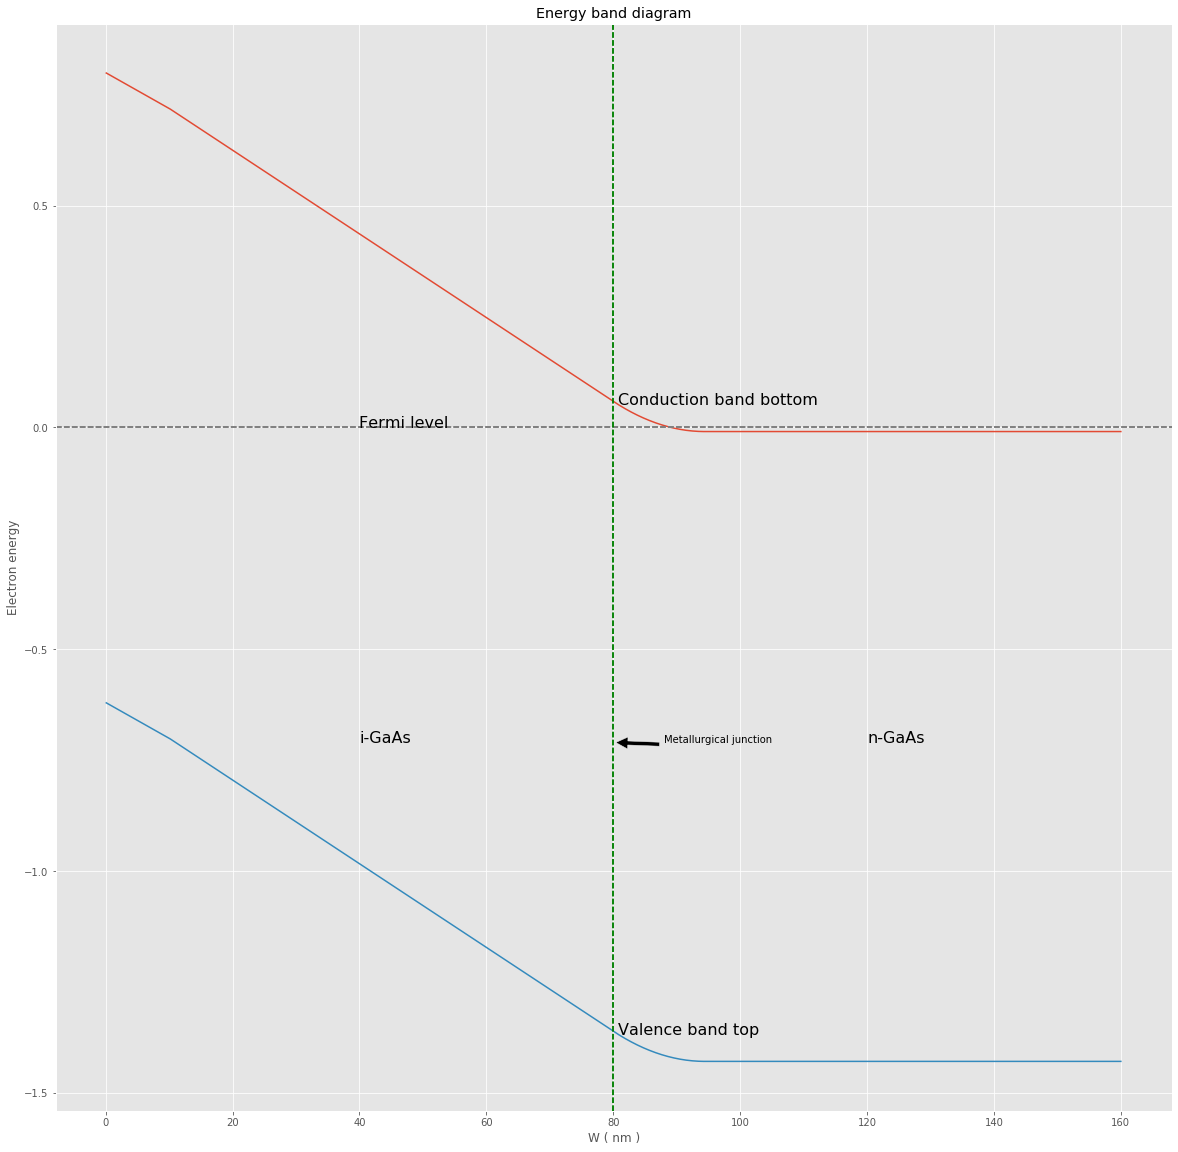

In [20]:
plt.plot(x,E_cb,x,E_vb)
plt.title('Energy band diagram')
plt.ylabel('Electron energy')
plt.xlabel('W ( nm )')
plt.axhline(y=0,color='gray',linestyle='--')
plt.text(0.5*W*1e7,0, 'Fermi level',fontsize=16)
plt.axhline(y=0,color='gray',linestyle='--')
plt.text(1.01*W*1e7,Ec(1.01*W), 'Conduction band bottom',fontsize=16)
plt.axhline(y=0,color='gray',linestyle='--')
plt.text(1.01*W*1e7,Ec(1.01*W)-Eg, 'Valence band top',fontsize=16)
plt.text(0.5*W*1e7,-Eg/2, 'i-GaAs',fontsize=16)
plt.text(1.5*W*1e7,-Eg/2, 'n-GaAs',fontsize=16)
plt.axvline(x=W*1e7,color='green',linestyle='--')
plt.axvline(x=W*1e7,color='green',linestyle='--')
plt.annotate('Metallurgical junction', xy=(W*1e7, -Eg/2), xytext=((W*1.1)*1e7, -Eg/2),arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()